### 잠재 의미 분석(Latent Semantic Analysis)
#### - 잠재 의미 분석(LSA)은 주로 문서 색인의 의미 검색에 사용
#### - 잠재 의미 인덱싱(LSA, LSI)로도 알려져 있음
#### - LSA의 목표는 문서와 단어의 기반이 되는 잠재적인 토픽을 발견하는 것
#### - 잠재적인 토픽은 문서에 있는 단어들의 분포를 주도한다고 가정

### LSA 방법 
#### - 문서~단어 행렬 (Document Term Matrix)
#### - 단어~토픽 행렬 (Term-Topic Matrix)
#### - 토픽~중요도 행렬 (Topic-Importance Matrix)
#### - 토픽~문서 행렬 (Topic-Document Matrix)

### 잠재 디레클레 할당 (Latent Dirichlet Alloction)
#### 잠재 디레클레 할당방법
#### - 사용자가 토픽의 개수를 지정해 알고리즘에 전달
#### - 모든 단어들을 토픽 중 하나에 할당
#### - 모든 문서의 모든 단어에 대해 단어 w가 가정에 의거, p(t|d), p(w|t)에 따라 토픽을 재할당
#### - 반복하면서 가정은 자신만이 잘못된 토픽에 할당되어 있고 다른 모든 단어는 올바른 토픽에 할당된것을 의미
#### - p(t|d) - 문서 d의 단어들 중 토픽 t에 해당되는 비율
#### - 해당 문서의 자주 등장하는 다른 단어의 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미
#### - p(w|t) - 단어 w를 가지고 있는 모든 문서들 중 토픽 t가 할당된 비율
#### - 다른 문서에서 단어 w에 많이 할당된 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미

## Read Data

In [1]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle = True, random_state = 1,
                            remove = ('headers', 'footers', 'quotes'))

documents = dataset.data

print(len(documents))
documents[0]

11314


"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

## Preprocessing

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import preprocess_string

nltk.download('stopwords')

def clean_text(d):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return d

def clean_stopword(d):
    stop_words = stopwords.words('english')
    return ' '.join([w.lower() for w in d.split() if w not in stop_words and len(w) > 3])

def preprocessing(d):
    return preprocess_string(d)

[nltk_data] Downloading package stopwords to /Users/jody/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import pandas as pd

news_df = pd.DataFrame({'article':documents})
len(news_df)

11314

In [5]:
news_df.replace("", float('NaN'), inplace=True)
news_df.dropna(inplace=True)
print(len(news_df))

11096


In [6]:
news_df['article'] = news_df['article'].apply(clean_text)

In [8]:
news_df['article']

0        Well i'm not sure about the story nad it did s...
1        \n\n\n\n\n\n\nYeah, do you expect people to re...
2        Although I realize that principle is not one o...
3        Notwithstanding all the legitimate fuss about ...
4        Well, I will have to change the scoring on my ...
                               ...                        
11309    Danny Rubenstein, an Israeli journalist, will ...
11310                                                   \n
11311    \nI agree.  Home runs off Clemens are always m...
11312    I used HP DeskJet with Orange Micros Grappler ...
11313                                          ^^^^^^\n...
Name: article, Length: 11096, dtype: object

In [11]:
news_df['article'] = news_df['article'].apply(clean_stopword)
news_df['article']

0        well sure story seem biased. what disagree sta...
1        yeah, expect people read faq, etc. actually ac...
2        although realize principle strongest points, w...
3        notwithstanding legitimate fuss proposal, much...
4        well, change scoring playoff pool. unfortunate...
                               ...                        
11309    danny rubenstein, israeli journalist, speaking...
11310                                                     
11311    agree. home runs clemens always memorable. kin...
11312    used deskjet orange micros grappler system6.0....
11313    ^^^^^^ argument murphy. scared hell came last ...
Name: article, Length: 11096, dtype: object

In [12]:
tokenized_news = news_df['article'].apply(preprocessing)
tokenized_news = tokenized_news.to_list()
tokenized_news

[['sure',
  'stori',
  'bias',
  'disagre',
  'statement',
  'media',
  'ruin',
  'israel',
  'reput',
  'redicul',
  'media',
  'pro',
  'isra',
  'media',
  'world',
  'have',
  'live',
  'europ',
  'realiz',
  'incid',
  'describ',
  'letter',
  'occur',
  'media',
  'ignor',
  'subsid',
  'israel',
  'exist',
  'european',
  'degre',
  'think',
  'reason',
  'report',
  'clearli',
  'atroc',
  'shame',
  'austria',
  'daili',
  'report',
  'inhuman',
  'act',
  'commit',
  'isra',
  'soldier',
  'bless',
  'receiv',
  'govern',
  'make',
  'holocaust',
  'guilt',
  'awai',
  'look',
  'jew',
  'treat',
  'race',
  'power',
  'unfortun'],
 ['yeah',
  'expect',
  'peopl',
  'read',
  'faq',
  'actual',
  'accept',
  'hard',
  'atheism',
  'need',
  'littl',
  'leap',
  'faith',
  'jimmi',
  'logic',
  'run',
  'steam',
  'jim',
  'sorri',
  'piti',
  'jim',
  'sorri',
  'feel',
  'denial',
  'faith',
  'need',
  'pretend',
  'happili',
  'mayb',
  'start',
  'newsgroup',
  'alt',
  '

#### 1개 이하인것들 제거

In [13]:
import numpy as np

drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1]
news_texts = np.delete(tokenized_news, drop_news, axis = 0)
print(len(news_texts))

10936


/Users/jody/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


## Gensim을 이용한 토픽 모델링

In [14]:
from gensim import corpora

dictionary = corpora.Dictionary(news_texts)
corpus = [dictionary.doc2bow(text) for text in news_texts]

print(corpus[1])

[(51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 2), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 3), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 2), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 2), (83, 1), (84, 1), (85, 1), (86, 1)]


### 잠재 의미 분석을 위한 LsiModel

In [15]:
from gensim.models import LsiModel

lsi_model = LsiModel(corpus, num_topics=20, id2word=dictionary)
topics = lsi_model.print_topics()
topics

[(0,
  '0.994*"max" + 0.069*"giz" + 0.068*"bhj" + 0.025*"qax" + 0.015*"biz" + 0.014*"nrhj" + 0.014*"bxn" + 0.012*"nui" + 0.011*"ghj" + 0.011*"zei"'),
 (1,
  '0.381*"file" + 0.193*"program" + 0.169*"edu" + 0.162*"imag" + 0.130*"avail" + 0.126*"output" + 0.119*"includ" + 0.115*"inform" + 0.101*"pub" + 0.100*"time"'),
 (2,
  '-0.408*"file" + -0.335*"output" + -0.216*"entri" + 0.171*"peopl" + 0.153*"know" + -0.137*"onam" + -0.134*"program" + 0.131*"said" + -0.129*"printf" + -0.115*"char"'),
 (3,
  '-0.249*"imag" + -0.226*"edu" + 0.214*"output" + 0.165*"peopl" + 0.157*"know" + 0.155*"entri" + 0.153*"said" + -0.153*"avail" + -0.142*"jpeg" + -0.124*"pub"'),
 (4,
  '0.549*"wire" + 0.223*"ground" + -0.214*"jpeg" + -0.213*"file" + -0.169*"imag" + 0.164*"circuit" + 0.157*"outlet" + 0.139*"connect" + 0.129*"subject" + 0.126*"neutral"'),
 (5,
  '-0.400*"jpeg" + -0.345*"imag" + 0.276*"anonym" + -0.246*"wire" + 0.160*"privaci" + 0.156*"internet" + -0.151*"color" + 0.144*"post" + 0.125*"inform" + 0.12

In [16]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 20, 25
coherence_scores = []

for num_topics in range(min_topics, max_topics):
    model = LsiModel(corpus, num_topics=num_topics, id2word=dictionary)
    coherence = CoherenceModel(model=model,
                              texts = news_texts,
                              dictionary=dictionary)
    coherence_scores.append(coherence.get_coherence())

print(coherence_scores)

[0.504223108595553, 0.44659673440675834, 0.4482265202721067, 0.4728098576742684, 0.45634553158901286]


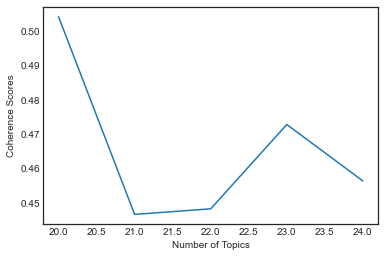

In [17]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = [int(i) for i in range(min_topics, max_topics)]
plt.plot(x, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores')
plt.show()

In [18]:
lsi_model = LsiModel(corpus, num_topics=24, id2word=dictionary)
topics = lsi_model.print_topics(num_topics=24)
topics

[(0,
  '-0.994*"max" + -0.069*"giz" + -0.068*"bhj" + -0.025*"qax" + -0.015*"biz" + -0.014*"nrhj" + -0.014*"bxn" + -0.012*"nui" + -0.011*"ghj" + -0.011*"zei"'),
 (1,
  '-0.381*"file" + -0.193*"program" + -0.169*"edu" + -0.162*"imag" + -0.130*"avail" + -0.126*"output" + -0.119*"includ" + -0.115*"inform" + -0.101*"pub" + -0.100*"time"'),
 (2,
  '0.408*"file" + 0.335*"output" + 0.216*"entri" + -0.171*"peopl" + -0.153*"know" + 0.137*"onam" + 0.134*"program" + -0.131*"said" + 0.129*"printf" + 0.115*"char"'),
 (3,
  '0.249*"imag" + 0.226*"edu" + -0.214*"output" + -0.165*"peopl" + -0.157*"know" + -0.155*"entri" + -0.153*"said" + 0.153*"avail" + 0.142*"jpeg" + 0.124*"pub"'),
 (4,
  '0.549*"wire" + 0.223*"ground" + -0.214*"jpeg" + -0.213*"file" + -0.169*"imag" + 0.164*"circuit" + 0.157*"outlet" + 0.139*"connect" + 0.129*"subject" + 0.126*"neutral"'),
 (5,
  '-0.400*"jpeg" + -0.345*"imag" + 0.276*"anonym" + -0.246*"wire" + 0.160*"privaci" + 0.156*"internet" + -0.151*"color" + 0.144*"post" + 0.125

### 잠재 디리클레 할당을 위한 LdaModel

In [19]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus, num_topics=20, id2word=dictionary)
topics = lda_model.print_topics()
topics

[(0,
  '0.014*"year" + 0.012*"player" + 0.011*"bhj" + 0.011*"car" + 0.009*"good" + 0.007*"chz" + 0.007*"radar" + 0.007*"detector" + 0.005*"time" + 0.005*"like"'),
 (1,
  '0.035*"christian" + 0.030*"jesu" + 0.019*"bibl" + 0.014*"church" + 0.013*"truth" + 0.010*"mormon" + 0.010*"god" + 0.010*"christ" + 0.008*"interpret" + 0.007*"absolut"'),
 (2,
  '0.013*"peopl" + 0.011*"think" + 0.010*"like" + 0.007*"know" + 0.007*"time" + 0.006*"right" + 0.006*"thing" + 0.005*"want" + 0.005*"go" + 0.005*"good"'),
 (3,
  '0.027*"game" + 0.017*"team" + 0.015*"plai" + 0.012*"year" + 0.008*"season" + 0.007*"score" + 0.007*"player" + 0.006*"like" + 0.006*"hockei" + 0.006*"goal"'),
 (4,
  '0.013*"mail" + 0.013*"post" + 0.009*"edu" + 0.007*"email" + 0.007*"send" + 0.007*"time" + 0.006*"new" + 0.006*"list" + 0.006*"thank" + 0.006*"book"'),
 (5,
  '0.017*"edu" + 0.011*"com" + 0.008*"april" + 0.007*"includ" + 0.006*"address" + 0.006*"group" + 0.006*"mail" + 0.005*"list" + 0.005*"inform" + 0.005*"post"'),
 (6,
  

In [20]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 20, 25
coherence_scores = []

for num_topics in range(min_topics, max_topics):
    model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
    coherence = CoherenceModel(model = model,
                              texts = news_texts,
                              dictionary=dictionary)
    coherence_scores.append(coherence.get_coherence())
    
print(coherence_scores)

[0.5175397830412216, 0.4969325213977504, 0.5034545197392307, 0.49174914351291327, 0.5053966662289163]


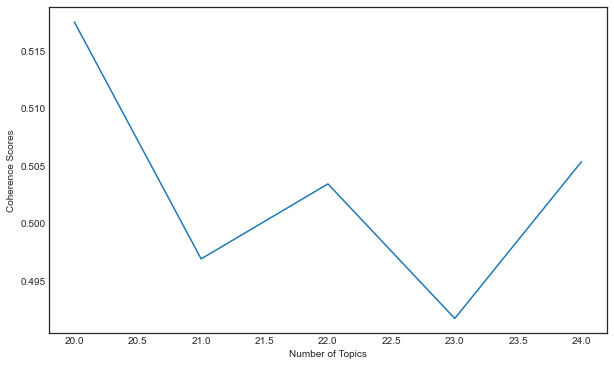

In [21]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = [int(i) for i in range(min_topics, max_topics)]

plt.figure(figsize=(10,6))
plt.plot(x, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores')
plt.show()

In [23]:
lda_model = LdaModel(corpus, num_topics=23, id2word=dictionary)
topics = lda_model.print_topics(num_topics=23)
topics

[(0,
  '0.016*"printf" + 0.014*"diseas" + 0.013*"health" + 0.010*"medic" + 0.010*"pain" + 0.009*"infect" + 0.009*"patient" + 0.007*"doctor" + 0.007*"len" + 0.007*"caus"'),
 (1,
  '0.012*"peopl" + 0.009*"right" + 0.008*"gun" + 0.007*"like" + 0.006*"state" + 0.006*"year" + 0.006*"know" + 0.006*"tobacco" + 0.006*"crimin" + 0.005*"time"'),
 (2,
  '0.015*"mail" + 0.010*"sale" + 0.009*"book" + 0.009*"list" + 0.008*"includ" + 0.008*"ship" + 0.007*"imak" + 0.006*"send" + 0.006*"price" + 0.006*"copi"'),
 (3,
  '0.019*"file" + 0.014*"output" + 0.007*"color" + 0.007*"offer" + 0.006*"includ" + 0.006*"look" + 0.006*"thank" + 0.006*"buf" + 0.006*"program" + 0.006*"jpeg"'),
 (4,
  '0.016*"orbit" + 0.011*"data" + 0.009*"space" + 0.009*"gov" + 0.009*"lunar" + 0.008*"adam" + 0.008*"earth" + 0.008*"nasa" + 0.006*"vice" + 0.006*"mission"'),
 (5,
  '0.010*"peopl" + 0.008*"know" + 0.006*"right" + 0.006*"state" + 0.006*"think" + 0.006*"time" + 0.006*"want" + 0.005*"like" + 0.004*"year" + 0.004*"question"'),


### 토픽 모델링 시각화

In [24]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/Users/jody/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
